In [5]:
import os

import pandas as pd
import numpy as np
import scanpy as sc 
import anndata as ann
import seaborn as sns

In [33]:
# Change to Iniq working dir
os.chdir("/scratch/gobi2/hmaan/Documents/Iniquitate")

In [34]:
# Load data on downsampling summaries 
os.chdir("results/downsample_summaries/")
ds_summary_files = os.listdir()
summaries_read = []
for f in ds_summary_files:
    summaries_read.append(pd.read_csv(f, sep = "\t"))
summaries_concat = pd.concat(summaries_read)

In [35]:
# Grep only those datasets that were used in the lowcap setup
summaries_concat_lowcap = summaries_concat[
    (summaries_concat.Dataset.isin([
        "pbmc_2_batch",
        "pbmc_4_batch",
        "mouse_hindbrain_6_batch",
        "peng_pdac_8_batch"
    ])) &
    (summaries_concat.Replicate <= 4)
]

In [58]:
# Load data on clustering summaries
os.chdir("../clustering_summaries/")
clustering_summary_files = os.listdir()
clustering_summaries_read = []
for f in clustering_summary_files:
    clustering_summaries_read.append(pd.read_csv(f, sep = "\t"))
clustering_summaries_concat = pd.concat(clustering_summaries_read)
clustering_summaries_concat_lowcap = clustering_summaries_concat[
    (clustering_summaries_concat.Dataset.isin([
        "pbmc_2_batch",
        "pbmc_4_batch",
        "mouse_hindbrain_6_batch",
        "peng_pdac_8_batch"
    ])) &
    (clustering_summaries_concat.Replicate <= 4) &
    (clustering_summaries_concat["Number of celltypes downsampled"] <= 3)
]

<AxesSubplot:xlabel='Number of celltypes downsampled', ylabel='Celltype ARI'>

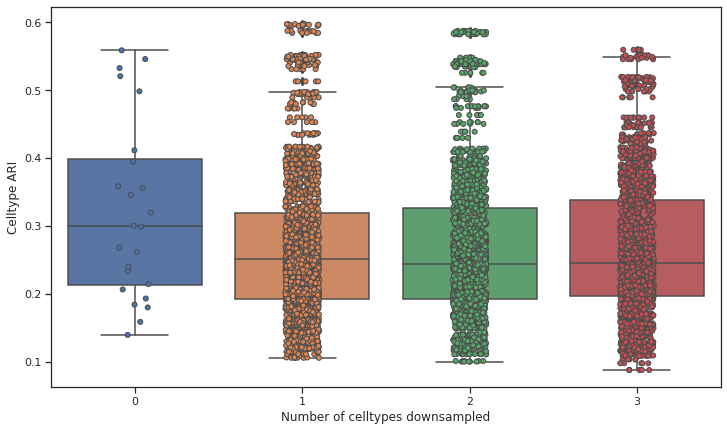

In [60]:
# Plot some basic summaries of celltype ARI, AMI, Homogeneity and Completeness
sns.set(rc = {'figure.figsize':(12,7)}, style = "ticks")
sns.stripplot(
    x="Number of celltypes downsampled", 
    y="Celltype ARI", 
    data=clustering_summaries_concat_lowcap, 
    linewidth=1,
    edgecolor='gray'
)
sns.boxplot(
    x = "Number of celltypes downsampled",
    y = "Celltype ARI",
    data = clustering_summaries_concat_lowcap
)

In [61]:
# Load data on cluster number summaries
os.chdir("../clustering_concord_summaries/")
cluster_num_summary_files = os.listdir()
cluster_num_summaries_read = []
for f in cluster_num_summary_files:
    cluster_num_summaries_read.append(pd.read_csv(f, sep = "\t"))
cluster_num_summaries_concat = pd.concat(cluster_num_summaries_read)
cluster_num_summaries_concat_lowcap = cluster_num_summaries_concat[
    (cluster_num_summaries_concat.Dataset.isin([
        "pbmc_2_batch",
        "pbmc_4_batch",
        "mouse_hindbrain_6_batch",
        "peng_pdac_8_batch"
    ])) &
    (cluster_num_summaries_concat.Replicate <= 4) &
    (cluster_num_summaries_concat["Number of celltypes downsampled"] <= 3)
]

[Text(0, 0.5, 'ARI of integration correspondence')]

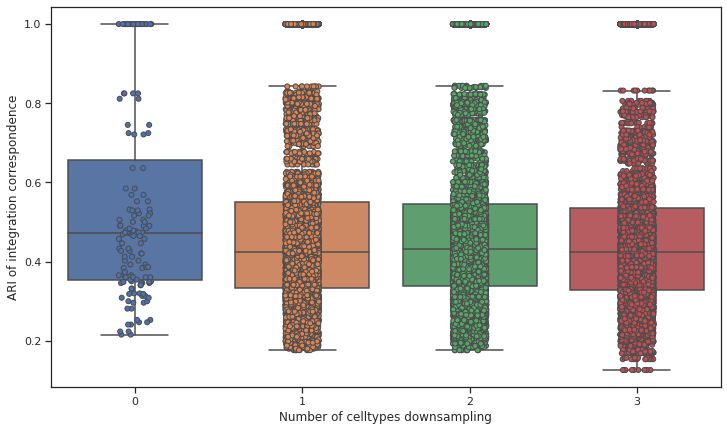

In [67]:
# Plot some basic summaries of celltype ARI for concordance
sns.set(rc = {'figure.figsize':(12,7)}, style = "ticks")
ax = sns.stripplot(
    x="Number of celltypes downsampled", 
    y="ARI", 
    data=cluster_num_summaries_concat_lowcap, 
    linewidth=1,
    edgecolor='gray'
)
ax = sns.boxplot(
    x = "Number of celltypes downsampled",
    y = "ARI",
    data = cluster_num_summaries_concat_lowcap
)
ax.set(xlabel = "Number of celltypes downsampling")
ax.set(ylabel = "ARI of integration correspondence")

In [64]:
cluster_num_summaries_concat_lowcap

,Dataset,Batches downsampled,Number of celltypes downsampled,Proportion downsampled,Replicate,Method 1,Method 2,ARI,Median ARI
0,pbmc_4_batch,1,1,0.25,2,harmony,harmony,1.000000,0.341153
1,pbmc_4_batch,1,1,0.25,2,scvi,harmony,0.341153,0.341153
2,pbmc_4_batch,1,1,0.25,2,bbknn,harmony,0.626890,0.341153
3,pbmc_4_batch,1,1,0.25,2,scanorama,harmony,0.464410,0.341153
4,pbmc_4_batch,1,1,0.25,2,seurat,harmony,0.469269,0.341153
...,...,...,...,...,...,...,...,...,...
31,pbmc_4_batch,1,2,0.75,3,scvi,liger,0.294107,0.310805
32,pbmc_4_batch,1,2,0.75,3,bbknn,liger,0.211661,0.310805
33,pbmc_4_batch,1,2,0.75,3,scanorama,liger,0.213631,0.310805
34,pbmc_4_batch,1,2,0.75,3,seurat,liger,0.298529,0.310805
